In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [22, 20]
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

### First glances on the dataset

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# Identifying if the dataset has null values

df.isnull().sum()

# Looks like our dataset has all rows duly filled.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Distribution of the grades

<AxesSubplot:ylabel='math score'>

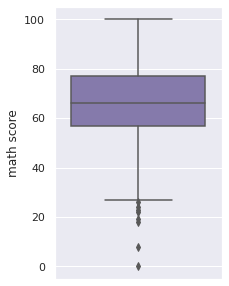

In [7]:
#Distribution for math score

sns.set_theme(style="ticks", palette="pastel")

sns.set(rc={"figure.figsize":(3, 5)}) #width=3, #height=5

sns.boxplot(y="math score",
            palette=["m", "g"],
            data=df)



(array([  2.,   5.,  26., 102., 266., 304., 216.,  79.]),
 array([  0. ,  12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ]),
 <BarContainer object of 8 artists>)

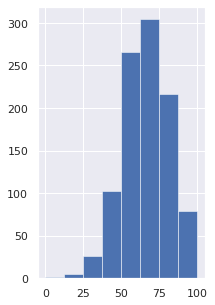

In [8]:
fig, ax = plt.subplots()

ax.hist(df['math score'], bins=8, linewidth=0.5, edgecolor="white")

<AxesSubplot:ylabel='reading score'>

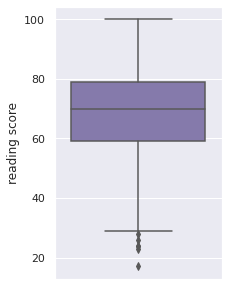

In [9]:
# Distribution for reading score 


sns.set_theme(style="ticks", palette="pastel")

sns.set(rc={"figure.figsize":(3, 5)}) #width=3, #height=5

sns.boxplot(y="reading score",
            palette=["m", "g"],
            data=df)


(array([  5.,  13.,  62., 157., 235., 279., 170.,  79.]),
 array([ 17.   ,  27.375,  37.75 ,  48.125,  58.5  ,  68.875,  79.25 ,
         89.625, 100.   ]),
 <BarContainer object of 8 artists>)

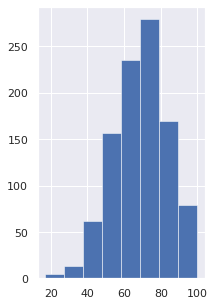

In [10]:
fig, ax = plt.subplots()

ax.hist(df['reading score'], bins=8, linewidth=0.5, edgecolor="white")

<AxesSubplot:ylabel='writing score'>

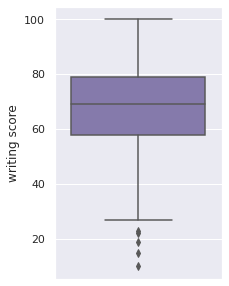

In [11]:
# Distribution for writing score 


sns.set_theme(style="ticks", palette="pastel")

sns.set(rc={"figure.figsize":(3, 5)}) #width=3, #height=5

sns.boxplot(y="writing score",
            palette=["m", "g"],
            data=df)


(array([  3.,   9.,  50., 141., 229., 289., 192.,  87.]),
 array([ 10.  ,  21.25,  32.5 ,  43.75,  55.  ,  66.25,  77.5 ,  88.75,
        100.  ]),
 <BarContainer object of 8 artists>)

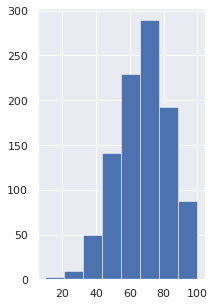

In [12]:
fig, ax = plt.subplots()

ax.hist(df['writing score'], bins=8, linewidth=0.5, edgecolor="white")

With the df.describe() method and the bloxplots here plotted one can see that the distribution is very similar to each matter.

# Correlation

In [13]:
df.corr().style.background_gradient(cmap="Blues")

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


We can see that there is a good positive correlation among the variables.

# How's the proportion between men and women?

In [14]:
df['gender'].value_counts('gender')

female    0.518
male      0.482
Name: gender, dtype: float64

In [15]:
# Inserting the values above in a python dictionary.
proportion = {}

proportion['female'] = df[df['gender']=='female']['gender'].count()
proportion['male'] = df[df['gender']=='male']['gender'].count()

print(proportion)

{'female': 518, 'male': 482}


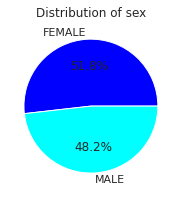

In [16]:
# Data to plot
labels = []
sizes = []

for x, y in proportion.items():
    labels.append(x)
    sizes.append(y)
    
labels = [x.upper() for x in labels]    
colors_list = ['blue','cyan']    
    
# Plot
plt.pie(sizes, labels=labels, colors=colors_list, autopct='%.1f%%')
plt.title("Distribution of sex")


plt.show()

One can see that the proportion is very equal, almost 50/50.

# How's the proportion of parental level of education?

In [17]:
df['parental level of education'].value_counts('parental level of education')

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64

# Which kind of lunch do the students prefer?

In [18]:
df['lunch'].value_counts('lunch')

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

One can see that most students opt for standart lunch.

# Race

In [19]:
df['race/ethnicity'].value_counts('race/ethnicity')

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

In [20]:
# Inserting the values above in a python dictionary.
race = {}

race['group_A'] = df[df['race/ethnicity']=='group A']['race/ethnicity'].count()
race['group_B'] = df[df['race/ethnicity']=='group B']['race/ethnicity'].count()
race['group_C'] = df[df['race/ethnicity']=='group C']['race/ethnicity'].count()
race['group_D'] = df[df['race/ethnicity']=='group D']['race/ethnicity'].count()
race['group_E'] = df[df['race/ethnicity']=='group E']['race/ethnicity'].count()

print(race)

{'group_A': 89, 'group_B': 190, 'group_C': 319, 'group_D': 262, 'group_E': 140}


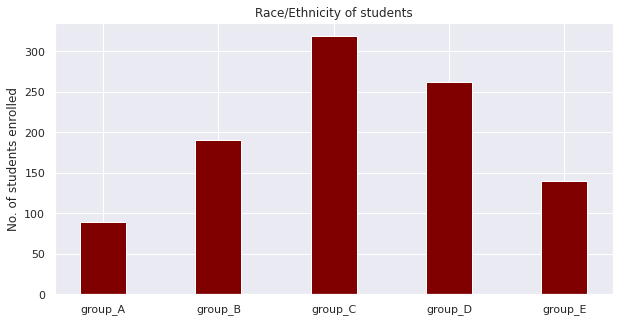

In [21]:
races = list(race.keys())
values = list(race.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(races, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("")
plt.ylabel("No. of students enrolled")
plt.title("Race/Ethnicity of students")
plt.show()